# Graph Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!sudo apt install build-essential python-dev libxml2 libxml2-dev zlib1g-dev
!sudo pip install cairocffi
!pip install python-igraph
!pip install termcolor
!pip install leidenalg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

E: Package 'python-dev' has no installation candidate
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.0 MB/s eta 0:00:00


In [4]:
from collections import Counter
import seaborn as sns
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
import seaborn as sns
import cairocffi
import scipy
np.random.seed(0)
import csv
%matplotlib inline
import random
from termcolor import colored
import leidenalg as la

In [ ]:
'''reader = csv.reader(open("/content/drive/MyDrive/Magistrale informatica/Data Analytics/Elaborato/dataset_finale.csv"))
type(reader)'''

'reader = csv.reader(open("/content/drive/MyDrive/Magistrale informatica/Data Analytics/Elaborato/dataset_finale.csv"))\ntype(reader)'

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Magistrale informatica/Data Analytics/Elaborato_Trippetta_Megna/data_sentiment.csv')
data.head(3)

,Unnamed: 0,body,createdAt,dataType,comment_id,numberOfreplies,parent_id,postId,upVotes,username,sentiment_label,sentiment_value
0,0,hear first understand like everything going sh...,2023-07-10T11:33:34.000Z,post,t3_14vrhak,NaN,NaN,NaN,0,SuperSeriousStud,positive,0.4676
1,1,neither ive gaming since late 80 confidently s...,2023-07-10T12:11:20.000Z,comment,t1_jre6f6t,1.0,t3_14vrhak,t3_14vrhak,19,TurkTurkle,neutral,0.5259
2,2,yes cause 80 digital games online games online...,2023-08-30T03:46:05.000Z,comment,t1_jybvjdw,0.0,t1_jre6f6t,t3_14vrhak,3,Pickles_68,neutral,0.5163


In [6]:
data_completo= pd.read_csv('/content/drive/MyDrive/Magistrale informatica/Data Analytics/Elaborato_Trippetta_Megna/dataset_finale.csv')
data_completo=data_completo[['Unnamed: 0', 'body']]
data=data[['createdAt', 'dataType', 'comment_id',
       'numberOfreplies', 'parent_id', 'postId', 'upVotes', 'username',
       'sentiment_label', 'sentiment_value']]

In [ ]:
data= pd.merge(data_completo, data, left_index=True, right_index=True)
data = pd.DataFrame(data)

In [ ]:
# Scopriamo quali sono i post:
lista_post= []
for index, row in data.iterrows():
    # Verifica se il valore nella colonna 'parent_id' è 'NaN'
    if pd.isna(row['parent_id']):
        lista_post.append(index)
lista_post

[0, 101, 108, 1465, 2606, 3038, 3179]

In [ ]:
df1 = data[:101]
df2 = data[101:108]
df3 = data[108:1465]
df4 = data[1465:2606]
df5 = data[2606:3038]
df6 = data[3038:3179]
df7 = data[3179:]

# Grafo solo sul primo post (DF1)
Per prova facciamo il grafo solo sul primo post

In [ ]:
df1.drop_duplicates(keep='last', subset= ['body', 'createdAt', 'dataType', 'comment_id', 'numberOfreplies', 'parent_id', 'postId', 'username'],inplace = True)
mini_data1 = df1
mini_data1 = mini_data1[['comment_id', 'parent_id','username','body']]
mini_data1.head()

<ipython-input-79-1a2bb3ee14fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(keep='last', subset= ['body', 'createdAt', 'dataType', 'comment_id', 'numberOfreplies', 'parent_id', 'postId', 'username'],inplace = True)


,comment_id,parent_id,username,body
0,t3_14vrhak,NaN,SuperSeriousStud,Hear me out first! Because I understand that m...
32,t1_jre3el9,t3_14vrhak,Cstone812,In no way is it declining. However I think it’...
33,t1_k7cx3ls,t1_jre3el9,siditious,Well revenues declined almost 5% year over yea...
34,t1_k7cy1ye,t1_k7cx3ls,Cstone812,Ok thanks.
35,t1_jre6f6t,t3_14vrhak,TurkTurkle,Neither. \n\nIve been gaming since the late 80...


In [ ]:
mini_grafo1 = ig.Graph(directed=True)                   # Creiamo il grafo vuoto
lista_vertitci = []                       # Inizializziamo questa liste vuota
'''lista_archi = []'''

mini_array1 = mini_data1.values             # Trasformiamo il df in array

Con il seguente codcice andiamo a creare il grafo:

In [ ]:
for n, line in enumerate(mini_array1):     # Con questo ciclo for andiamo ad ag=
  username = str(line[2])                 # giungere i vertici al grafo.
  if username not in lista_vertitci:
    lista_vertitci.append(username)
    mini_grafo1.add_vertices(username)
  else:
    pass

for liste in mini_array1:
  commento = str(liste[0])
  target = str(liste[1])
  username = str(liste[2])
  indice_nodo = mini_grafo1.vs.find(username).index
  ###
  for altre_liste in mini_array1:
    a_commento = str(altre_liste[0])
    a_target = str(altre_liste[1])
    a_username = str(altre_liste[2])
    ndice_nodo_2 = mini_grafo1.vs.find(a_username).index
    if target == a_commento:
      mini_grafo1.add_edge(indice_nodo,ndice_nodo_2)
    else:
      pass


mini_grafo1.vs[0]['color'] = 'blue'

Coloriamo gli archi diretti al post:

Ora riproponiamolo a cerchio

In [ ]:
'''# Ora che i colori degli archi sono stati impostati, puoi plottare il grafo
ig.plot(Grafo_solo_commenti_al_post1,
        vertex_label=Grafo_solo_commenti_al_post1.vs["name"],
        layout='circle')'''

'# Ora che i colori degli archi sono stati impostati, puoi plottare il grafo\nig.plot(Grafo_solo_commenti_al_post1,\n        vertex_label=Grafo_solo_commenti_al_post1.vs["name"],\n        layout=\'circle\')'

Proviamo a creare un grafo in cui ci sono meno archi rendendolo più leggibile:

In [ ]:
from collections import defaultdict

df = pd.DataFrame(mini_array1, columns=['comment_id', 'parent_id', 'username', 'body'])

# Identificare il nodo del post originale
post_id = df.iloc[0]['comment_id']
post_username = df.iloc[0]['username']

# Creare un dizionario per contare gli archi e i pesi
edge_weights = defaultdict(int)

# Popola il dizionario con gli archi e i pesi
for _, row in df.iterrows():
    if pd.notna(row['parent_id']):
        parent_user = df[df['comment_id'] == row['parent_id']]['username']
        if not parent_user.empty:
            edge = (row['username'], parent_user.values[0])  # Invertito l'ordine degli archi
            edge_weights[edge] += 1

# Creare una lista di nodi e una lista di archi con pesi
nodes = list(set(df['username']))
edges = [(k[0], k[1], v) for k, v in edge_weights.items()]

# Creare il grafo con igraph
g = ig.Graph(directed=True)
g.add_vertices(nodes)

# Aggiungere gli archi al grafo
for edge in edges:
    g.add_edge(edge[0], edge[1], weight=edge[2])

# Colorare il nodo del post originale di blu e gli altri di rosso
node_colors = ['DarkCyan' if username == post_username else 'CornflowerBlue' for username in g.vs['name']]

# Trovare l'indice del nodo del post originale
post_vertex_index = g.vs.find(name=post_username).index

# Colorare gli archi che puntano al nodo del post originale di viola, gli altri di nero
edge_colors = ['LightSalmon' if edge.target == post_vertex_index else 'Gray' for edge in g.es]

# Visualizzare le informazioni sul grafo
print(g.summary())

# Vediamo la percentuale di purple:
archi_purple = 0
for colori in edge_colors:
  if colori == 'purple':
    archi_purple +=1
print('La percentuale di archi viola è del: ',(archi_purple*100)/len(df1),'%')

IGRAPH DNW- 23 44 -- 
+ attr: name (v), weight (e)
La percentuale di archi viola è del:  0.0 %


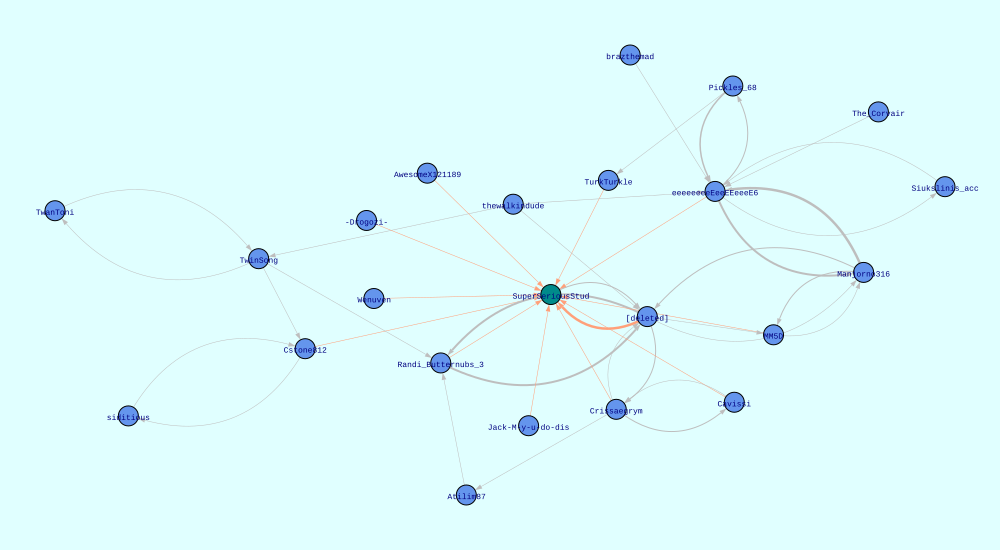

In [ ]:
layout = g.layout('kamada_kawai')
ig.plot(g, layout=layout, vertex_label=g.vs["name"], vertex_color=node_colors,
        edge_color=edge_colors, edge_width=[w['weight']/2 for w in g.es],edge_arrow_size=0.5,
        vertex_label_size = 8, vertex_label_color= 'Navy',
        bbox = (1000,550),
        background="LightCyan",
        margin = 55)

In [ ]:
archi_per_post = []
for stringhe in edge_colors:
  if stringhe == 'LightSalmon':
    archi_per_post.append(stringhe)
print('Al post sono diretti', len(archi_per_post),'archi')
print('In tutto sono il '+ str(len(archi_per_post)/len(df1)*100)+'%')

Al post sono diretti 12 archi
In tutto sono il 17.142857142857142%


## Osservazioni commenti


Proviamo a dividre i commenti:

In [ ]:
lista_user=[]
for i in mini_array1:
  if i[2] not in lista_user:
    lista_user.append(i[2])

diz1 = {}
for user in lista_user:
  diz1[user] = {}
  for _, row in df.iterrows():   # _ è l'indice
    if row.username != user:
      if row.username not in diz1[user]:
        diz1[user][row.username] = [(_,row.body)]
      elif row.username in diz1[user]:
        diz1[user][row.username].append((_,row.body))
print(diz1)

{'SuperSeriousStud': {'Cstone812': [(1, 'In no way is it declining. However I think it’s getting harder for studios to make big budget games without some kind of guaranteed success. Didn’t Jason scheirer just say it takes a crazy amount of time to make a big budget AAA game these days?'), (3, 'Ok thanks.')], 'siditious': [(2, 'Well revenues declined almost 5% year over year from last year so in at least one way the industry is factually, statistically, objectively declining.')], 'TurkTurkle': [(4, 'Neither. \n\nIve been gaming since the late 80s and can confidently say\n\nIts always been like this. A few islands of quality in a sea of sewage')], 'Pickles_68': [(5, 'Yes cause the 80s had digital only games online only games online multiplayer an battle passes not to mention cost to play online lmao today is nothing like the 80s'), (38, "Didn't know art could release broken"), (43, 'How does one break a digital frame'), (47, 'With water')], 'eeeeeeeeEeeEEeeeE6': [(6, "it's weird.\n\ngami

## Metriche descritive



Iniziamo col creare la matricie di adiacenza:

In [ ]:
# Ottieni la matrice di adiacenza dal grafo
matrice_adiacenza = mini_grafo1.get_adjacency()
print(matrice_adiacenza)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
 [5, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0

Bisogna ricordare due nozioni:
- OUTDEGREE: Corrisponde al numero totale di archi uscenti da un nodo; esso corrisponde alla somma dei valori sulle righe.
- INDEGREE: Corrisponde al numero totale di archi entranti da un nodo; esso corrisponde alla somma dei valori sulle colonne.

Esiste anche il TOTAL DEGREE: ovvero la somma di OUTDEGREE e INDEGREE.

### Calcolo OUTDEGREE, INDEGREE e TOTALDEGREE
Intendiamo come grado di un nodo, in questo caso, il numero di archi entranti che possiede un nodi. Nella pratica significa che ogni nodo è importante, tanto quanto, il numero delle risposte degli altri utenti.

In [ ]:
def edge_counts(graph):
    incoming_edges = {}
    outgoing_edges = {}

    for node in graph.vs:
        node_name = node["name"]  # Supponendo che i nodi abbiano un attributo "name"
        incoming_edges[node_name] = 0  # Inizializza il conteggio degli archi entranti per il nodo
        outgoing_edges[node_name] = 0  # Inizializza il conteggio degli archi uscenti per il nodo

        for edge in graph.es:
            if edge.target == node.index:  # Se l'estremità di destinazione dell'arco è il nodo attuale
                incoming_edges[node_name] += 1  # Incrementa il conteggio degli archi entranti per il nodo
            elif edge.source == node.index:  # Se l'estremità di partenza dell'arco è il nodo attuale
                outgoing_edges[node_name] += 1  # Incrementa il conteggio degli archi uscenti per il nodo

    return incoming_edges, outgoing_edges

# Esempio di utilizzo
grafo_orientato = mini_grafo1  # Assumendo che mini_grafo1 sia il tuo grafo diretto

# Ottieni il numero di archi entranti e uscenti per ogni nodo
numero_archi_entranti, numero_archi_uscenti = edge_counts(grafo_orientato)
print("Numero di archi entranti per nodo:")
print(numero_archi_entranti)
print("Numero di archi uscenti per nodo:")
print(numero_archi_uscenti)

Numero di archi entranti per nodo:
{'SuperSeriousStud': 16, 'Cstone812': 2, 'siditious': 1, 'TurkTurkle': 1, 'Pickles_68': 2, 'eeeeeeeeEeeEEeeeE6': 12, 'brazthemad': 0, 'TwinSong': 2, 'Randi_Butternubs_3': 6, 'The_Corvair': 0, 'Manjorno316': 6, '[deleted]': 10, 'thewalkindude': 0, 'Atilim87': 1, 'Crissaegrym': 3, 'Siukslinis_acc': 1, 'TwanToni': 1, 'Cavissi': 2, 'Jack-M-y-u-do-dis': 0, 'MM5D': 3, '-Drogozi-': 0, 'Wenuven': 0, 'AwesomeX121189': 0}
Numero di archi uscenti per nodo:
{'SuperSeriousStud': 2, 'Cstone812': 2, 'siditious': 1, 'TurkTurkle': 1, 'Pickles_68': 4, 'eeeeeeeeEeeEEeeeE6': 8, 'brazthemad': 1, 'TwinSong': 3, 'Randi_Butternubs_3': 5, 'The_Corvair': 1, 'Manjorno316': 9, '[deleted]': 13, 'thewalkindude': 3, 'Atilim87': 1, 'Crissaegrym': 5, 'Siukslinis_acc': 1, 'TwanToni': 1, 'Cavissi': 2, 'Jack-M-y-u-do-dis': 1, 'MM5D': 2, '-Drogozi-': 1, 'Wenuven': 1, 'AwesomeX121189': 1}


In [ ]:
# Creiamo un dizionario contenente la somma dei degree per ottenere il total degree:
archi_totali = numero_archi_entranti.copy()
for key in numero_archi_uscenti:
  degree = int(numero_archi_uscenti[key])
  archi_totali[key] += degree

print(archi_totali)

{'SuperSeriousStud': 18, 'Cstone812': 4, 'siditious': 2, 'TurkTurkle': 2, 'Pickles_68': 6, 'eeeeeeeeEeeEEeeeE6': 20, 'brazthemad': 1, 'TwinSong': 5, 'Randi_Butternubs_3': 11, 'The_Corvair': 1, 'Manjorno316': 15, '[deleted]': 23, 'thewalkindude': 3, 'Atilim87': 2, 'Crissaegrym': 8, 'Siukslinis_acc': 2, 'TwanToni': 2, 'Cavissi': 4, 'Jack-M-y-u-do-dis': 1, 'MM5D': 5, '-Drogozi-': 1, 'Wenuven': 1, 'AwesomeX121189': 1}


Facciamo qualche plot per capire meglio:

In [ ]:
'''plt.scatter(numero_archi_entranti.keys(), numero_archi_entranti.values())
plt.xticks([])
plt.xlabel('USER')
plt.ylabel('DEGREE')
plt.title('INDEGREE')
plt.show()'''

"plt.scatter(numero_archi_entranti.keys(), numero_archi_entranti.values())\nplt.xticks([])\nplt.xlabel('USER')\nplt.ylabel('DEGREE')\nplt.title('INDEGREE')\nplt.show()"

In [ ]:
'''plt.scatter(numero_archi_uscenti.keys(), numero_archi_uscenti.values())
plt.xticks([])
plt.xlabel('USER')
plt.ylabel('DEGREE')
plt.title('OUTDEGREE')
plt.show()'''

"plt.scatter(numero_archi_uscenti.keys(), numero_archi_uscenti.values())\nplt.xticks([])\nplt.xlabel('USER')\nplt.ylabel('DEGREE')\nplt.title('OUTDEGREE')\nplt.show()"

In [ ]:
'''plt.scatter(archi_totali.keys(), archi_totali.values())
plt.xticks([])
plt.xlabel('USER')
plt.ylabel('DEGREE')
plt.title('TOTALDEGREE')
plt.show()'''

"plt.scatter(archi_totali.keys(), archi_totali.values())\nplt.xticks([])\nplt.xlabel('USER')\nplt.ylabel('DEGREE')\nplt.title('TOTALDEGREE')\nplt.show()"

In [ ]:
for key in numero_archi_entranti:
  print(key)

SuperSeriousStud
Cstone812
siditious
TurkTurkle
Pickles_68
eeeeeeeeEeeEEeeeE6
brazthemad
TwinSong
Randi_Butternubs_3
The_Corvair
Manjorno316
[deleted]
thewalkindude
Atilim87
Crissaegrym
Siukslinis_acc
TwanToni
Cavissi
Jack-M-y-u-do-dis
MM5D
-Drogozi-
Wenuven
AwesomeX121189


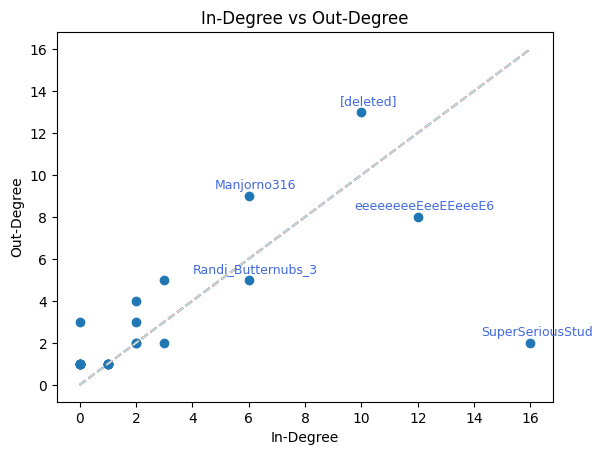

In [ ]:
plt.scatter(numero_archi_entranti.values(), numero_archi_uscenti.values())
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('In-Degree vs Out-Degree')
max_degree = max(max(numero_archi_entranti.values()), max(numero_archi_uscenti.values()))
plt.plot([0, max_degree], [0, max_degree], linestyle='--', color='red')  # Linea diagonale per confronto

for nome, in_degree in numero_archi_entranti.items():
    out_degree = numero_archi_uscenti.get(nome, 0)  # Ottieni il grado uscente per il nome dell'utente
    if in_degree > 5 or out_degree > 5:
        plt.annotate(nome, (in_degree, out_degree), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9, color='RoyalBlue')

# Cambia il colore della linea in mezzo
plt.plot([0, max_degree], [0, max_degree], linestyle='--', color='PowderBlue')

plt.show()

## Comportamento temporale

In [ ]:
lista_giorno = {}
for n,date in enumerate(df1.createdAt):
  date = date.split('-')
  anno = date[0]
  mese = date[1]
  dday = date[2].split(':')

  giorno_ora = dday[0].split('T')
  giorno = giorno_ora[0]
  ora = giorno_ora[1]
  minuti = dday[1]

  secondi = dday[2].split('.')
  secondi = secondi[0]

  lista_giorno[n] = [anno, mese, giorno, ora, minuti, secondi]

Impostiamo la data del post come il tempo zero:

In [ ]:
diz_tempo = {}
for key in lista_giorno:
  anno = int(lista_giorno[key][0]) - int(lista_giorno[0][0])
  mese = int(lista_giorno[key][1]) - int(lista_giorno[0][1])
  giorno = int(lista_giorno[key][2])-int(lista_giorno[0][2])
  ora = int(lista_giorno[key][3])

  diz_tempo[key] = [anno, mese, giorno, ora]


l_ore = []
for chiavi in diz_tempo:
  anno = int(diz_tempo[chiavi][0])
  mese = int(diz_tempo[chiavi][1])
  giorno = int(diz_tempo[chiavi][2])
  ora = int(diz_tempo[chiavi][3])

  ore_anno = 8.760*anno
  ore_mese = 720*mese
  ore_giorno = giorno*24
  o = ore_anno + ore_mese + ore_giorno + ora - diz_tempo[0][3]
  l_ore.append(o)
l_ore = sorted(l_ore)

################################################################################
diz_ora_ordinato = {}
for indice, c in enumerate(l_ore):
  diz_ora_ordinato[indice] = c

diz_plot = {}
for cc in diz_ora_ordinato:
  chiav = diz_ora_ordinato[cc]
  if chiav not in diz_plot:
    diz_plot[chiav] = 1
  elif chiav in diz_plot:
    diz_plot[chiav] += 1
diz_plot

ddiz_plot ={}
for chiave in diz_plot:
  if chiave < 10:
    val = diz_plot[chiave]
    ddiz_plot[chiave] = val
ddiz_plot

{0.0: 10, 1.0: 22, 2.0: 16, 3.0: 7, 4.0: 1, 5.0: 1, 6.0: 1, 7.0: 2, 8.0: 1}

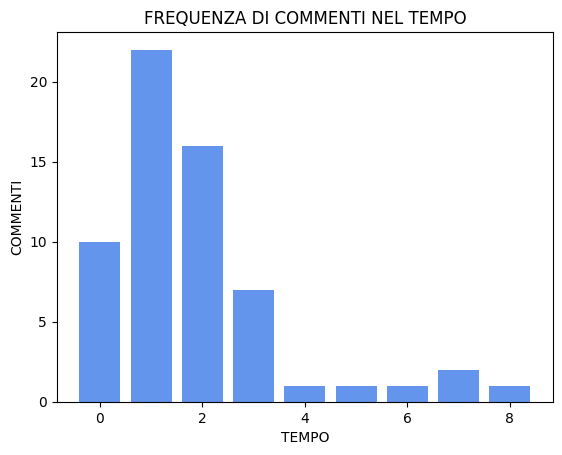

In [ ]:
plt.bar(ddiz_plot.keys(), ddiz_plot.values(), color = 'CornflowerBlue')
plt.xlabel('TEMPO')
plt.ylabel('COMMENTI')
plt.title('FREQUENZA DI COMMENTI NEL TEMPO')
plt.show()

# Grafo solo sul secondo post (DF6)
Per prova facciamo il grafo solo sul primo post

In [ ]:
df6 = df6.drop([3158,3157])
mini_data2 = df6
mini_data2 = mini_data2[['comment_id', 'parent_id','username','body']]
mini_data2.head()

,comment_id,parent_id,username,body
3038,t3_1bzwwsl,NaN,MPsAreSnitches,URL: https://thedailycougar.com/2024/04/09/abu...
3039,t1_kyt5lmy,t3_1bzwwsl,RareCodeMonkey,It is just impossible for the average person t...
3040,t1_kytjk47,t1_kyt5lmy,[deleted],And you're going to accept. It's not as if dec...
3041,t1_kyttfpr,t1_kytjk47,ADHD_Supernova,The only way to win is not to play.
3042,t1_kytwqjg,t1_kyttfpr,No-Roll-3759,"i'm an old person, but i got my first fancy gr..."


In [ ]:
mini_grafo2 = ig.Graph(directed=True)                   # Creiamo il grafo vuoto
lista_vertitci = []                       # Inizializziamo questa liste vuota
'''lista_archi = []'''

mini_array2 = mini_data2.values             # Trasformiamo il df in array

Con il seguente codcice andiamo a creare il grafo:

In [ ]:
for n, line in enumerate(mini_array2):     # Con questo ciclo for andiamo ad ag=
  username = str(line[2])                 # giungere i vertici al grafo.
  if username not in lista_vertitci:
    lista_vertitci.append(username)
    mini_grafo2.add_vertices(username)
  else:
    pass

for liste in mini_array2:
  commento = str(liste[0])
  target = str(liste[1])
  username = str(liste[2])
  indice_nodo = mini_grafo2.vs.find(username).index
  ###
  for altre_liste in mini_array2:
    a_commento = str(altre_liste[0])
    a_target = str(altre_liste[1])
    a_username = str(altre_liste[2])
    ndice_nodo_2 = mini_grafo2.vs.find(a_username).index
    if target == a_commento:
      mini_grafo2.add_edge(indice_nodo,ndice_nodo_2)
    else:
      pass


mini_grafo2.vs[0]['color'] = 'blue'

Coloriamo gli archi diretti al post:

Ora riproponiamolo a cerchio

In [ ]:
'''# Ora che i colori degli archi sono stati impostati, puoi plottare il grafo
ig.plot(Grafo_solo_commenti_al_post2,
        vertex_label=Grafo_solo_commenti_al_post2.vs["name"],
        layout='circle')'''

'# Ora che i colori degli archi sono stati impostati, puoi plottare il grafo\nig.plot(Grafo_solo_commenti_al_post2,\n        vertex_label=Grafo_solo_commenti_al_post2.vs["name"],\n        layout=\'circle\')'

Proviamo a creare un grafo in cui ci sono meno archi rendendolo più leggibile:

In [ ]:
from collections import defaultdict

df = pd.DataFrame(mini_array2, columns=['comment_id', 'parent_id', 'username', 'body'])

# Identificare il nodo del post originale
post_id = df.iloc[0]['comment_id']
post_username = df.iloc[0]['username']

# Creare un dizionario per contare gli archi e i pesi
edge_weights = defaultdict(int)

# Popola il dizionario con gli archi e i pesi
for _, row in df.iterrows():
    if pd.notna(row['parent_id']):
        parent_user = df[df['comment_id'] == row['parent_id']]['username']
        if not parent_user.empty:
            edge = (row['username'], parent_user.values[0])  # Invertito l'ordine degli archi
            edge_weights[edge] += 1

# Creare una lista di nodi e una lista di archi con pesi
nodes = list(set(df['username']))
edges = [(k[0], k[1], v) for k, v in edge_weights.items()]

# Creare il grafo con igraph
g = ig.Graph(directed=True)
g.add_vertices(nodes)

# Aggiungere gli archi al grafo
for edge in edges:
    g.add_edge(edge[0], edge[1], weight=edge[2])

# Colorare il nodo del post originale di blu e gli altri di rosso
node_colors = ['DarkCyan' if username == post_username else 'CornflowerBlue' for username in g.vs['name']]

# Trovare l'indice del nodo del post originale
post_vertex_index = g.vs.find(name=post_username).index

# Colorare gli archi che puntano al nodo del post originale di viola, gli altri di nero
edge_colors = ['LightSalmon' if edge.target == post_vertex_index else 'Gray' for edge in g.es]

# Visualizzare le informazioni sul grafo
print(g.summary())


# Vediamo la percentuale di purple:
archi_purple = 0
for colori in edge_colors:
  if colori == 'purple':
    archi_purple +=1
print('La percentuale di archi viola è del: ',(archi_purple*100)/len(df1),'%')

IGRAPH DNW- 108 131 -- 
+ attr: name (v), weight (e)
La percentuale di archi viola è del:  0.0 %


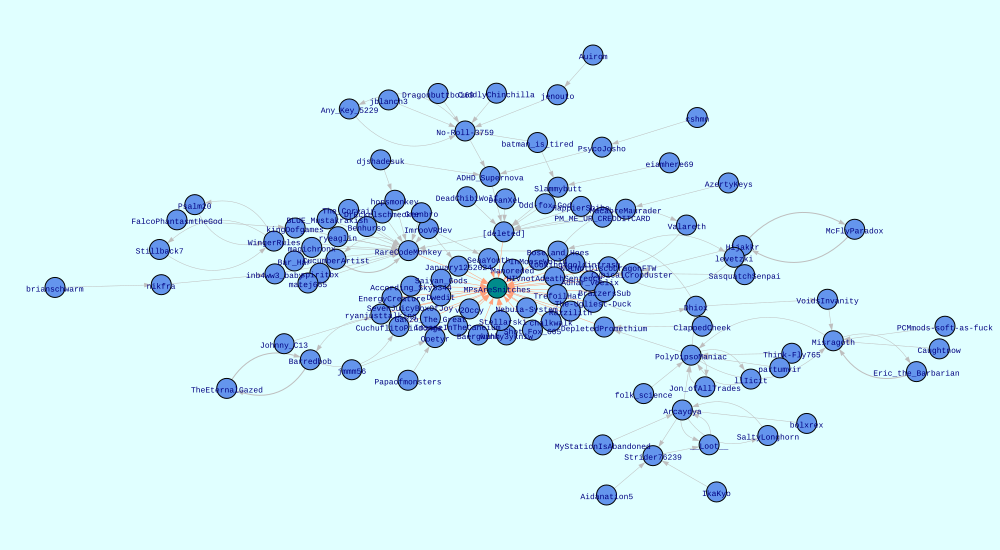

In [ ]:
layout = g.layout('kamada_kawai')
ig.plot(g, layout=layout, vertex_label=g.vs["name"], vertex_color=node_colors,
        edge_color=edge_colors, edge_width=[w['weight']/2 for w in g.es],edge_arrow_size=0.5,
        vertex_label_size = 8, vertex_label_color= 'Navy',
        bbox = (1000,550),
        background="LightCyan",
        margin = 55)

Salviamo il grafo con un altro nome:

In [ ]:
g2 = g

In [ ]:
archi_per_post = []
for stringhe in edge_colors:
  if stringhe == 'LightSalmon':
    archi_per_post.append(stringhe)
print('Al post sono diretti', len(archi_per_post),'archi')
print('In tutto sono il '+ str(len(archi_per_post)/len(df6)*100)+'%')

Al post sono diretti 33 archi
In tutto sono il 23.741007194244602%


## Osservazioni commenti


Proviamo a dividre i commenti:

In [ ]:
lista_user=[]
for i in mini_array2:
  if i[2] not in lista_user:
    lista_user.append(i[2])

diz2 = {}
for user in lista_user:
  diz2[user] = {}
  for _, row in df.iterrows():   # _ è l'indice
    if row.username != user:
      if row.username not in diz2[user]:
        diz2[user][row.username] = [(_,row.body)]
      elif row.username in diz2[user]:
        diz2[user][row.username].append((_,row.body))
print(diz2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Metriche descritive



Iniziamo col creare la matricie di adiacenza:

In [ ]:
# Ottieni la matrice di adiacenza dal grafo
matrice_adiacenza = mini_grafo2.get_adjacency()

Bisogna ricordare due nozioni:
- OUTDEGREE: Corrisponde al numero totale di archi uscenti da un nodo; esso corrisponde alla somma dei valori sulle righe.
- INDEGREE: Corrisponde al numero totale di archi entranti da un nodo; esso corrisponde alla somma dei valori sulle colonne.

Esiste anche il TOTAL DEGREE: ovvero la somma di OUTDEGREE e INDEGREE.

### Calcolo OUTDEGREE, INDEGREE e TOTALDEGREE
Intendiamo come grado di un nodo, in questo caso, il numero di archi entranti che possiede un nodi. Nella pratica significa che ogni nodo è importante, tanto quanto, il numero delle risposte degli altri utenti.

In [ ]:
def edge_counts(graph):
    incoming_edges = {}
    outgoing_edges = {}

    for node in graph.vs:
        node_name = node["name"]  # Supponendo che i nodi abbiano un attributo "name"
        incoming_edges[node_name] = 0  # Inizializza il conteggio degli archi entranti per il nodo
        outgoing_edges[node_name] = 0  # Inizializza il conteggio degli archi uscenti per il nodo

        for edge in graph.es:
            if edge.target == node.index:  # Se l'estremità di destinazione dell'arco è il nodo attuale
                incoming_edges[node_name] += 1  # Incrementa il conteggio degli archi entranti per il nodo
            elif edge.source == node.index:  # Se l'estremità di partenza dell'arco è il nodo attuale
                outgoing_edges[node_name] += 1  # Incrementa il conteggio degli archi uscenti per il nodo

    return incoming_edges, outgoing_edges

# Esempio di utilizzo
grafo_orientato = mini_grafo2  # nome del grafo

# Ottieni il numero di archi entranti e uscenti per ogni nodo
numero_archi_entranti, numero_archi_uscenti = edge_counts(grafo_orientato)
print("Numero di archi entranti per nodo:")
print(numero_archi_entranti)
print("Numero di archi uscenti per nodo:")
print(numero_archi_uscenti)

Numero di archi entranti per nodo:
{'MPsAreSnitches': 33, 'RareCodeMonkey': 19, '[deleted]': 8, 'ADHD_Supernova': 3, 'No-Roll-3759': 6, 'jenouto': 1, 'Auirom': 0, 'jblanch3': 0, 'batman_is_tired': 0, 'Dragonbuttboi69': 0, 'CuddlyChinchilla': 0, 'Any_Key_5229': 1, 'PsycoJosho': 1, 'cshmn': 0, 'djshadesuk': 0, 'Slammybutt': 2, 'eiamhere69': 0, 'MacabreMaurader': 1, 'AzertyKeys': 0, 'DeanXeL': 0, 'DeadChibiWolf': 0, 'Odd-fox-God': 0, 'PM_ME_UR_CREDDITCARD': 0, 'HappierShibe': 0, 'hopsmonkey': 1, 'spiritbx': 0, 'Grenbro': 0, 'WingerRules': 2, 'Stillback7': 1, 'Psalm20': 1, 'kingOofgames': 1, 'FalcoPhantasmtheGod': 0, 'BLUE_Mustakrakish': 0, 'Bose_and_Hoes': 2, 'Dhiox': 2, 'Valareth': 1, 'magichronx': 0, 'ryeaglin': 0, 'Bar_Har': 0, 'ImrooVRdev': 0, 'CucumberArtist': 1, 'The_Corvair': 0, 'DrEckelschmecker': 0, 'Benhurso': 0, 'inb4ww3_baby': 1, 'nikfra': 1, 'brianschwarm': 0, 'matej665': 0, 'CubicalCropduster': 2, 'Hijakkr': 2, 'McFlyParadox': 2, 'SasquatchSenpai': 0, 'ryanjusttalking': 1, '

In [ ]:
# Creiamo un dizionario contenente la somma dei degree per ottenere il total degree:
archi_totali = numero_archi_entranti.copy()
for key in numero_archi_uscenti:
  degree = int(numero_archi_uscenti[key])
  archi_totali[key] += degree

print(archi_totali)

{'MPsAreSnitches': 33, 'RareCodeMonkey': 21, '[deleted]': 10, 'ADHD_Supernova': 4, 'No-Roll-3759': 8, 'jenouto': 2, 'Auirom': 1, 'jblanch3': 1, 'batman_is_tired': 2, 'Dragonbuttboi69': 1, 'CuddlyChinchilla': 1, 'Any_Key_5229': 2, 'PsycoJosho': 2, 'cshmn': 1, 'djshadesuk': 2, 'Slammybutt': 3, 'eiamhere69': 1, 'MacabreMaurader': 2, 'AzertyKeys': 1, 'DeanXeL': 1, 'DeadChibiWolf': 1, 'Odd-fox-God': 1, 'PM_ME_UR_CREDDITCARD': 1, 'HappierShibe': 1, 'hopsmonkey': 2, 'spiritbx': 1, 'Grenbro': 1, 'WingerRules': 5, 'Stillback7': 2, 'Psalm20': 2, 'kingOofgames': 2, 'FalcoPhantasmtheGod': 1, 'BLUE_Mustakrakish': 1, 'Bose_and_Hoes': 5, 'Dhiox': 4, 'Valareth': 2, 'magichronx': 1, 'ryeaglin': 1, 'Bar_Har': 1, 'ImrooVRdev': 3, 'CucumberArtist': 3, 'The_Corvair': 1, 'DrEckelschmecker': 1, 'Benhurso': 1, 'inb4ww3_baby': 2, 'nikfra': 2, 'brianschwarm': 1, 'matej665': 1, 'CubicalCropduster': 3, 'Hijakkr': 5, 'McFlyParadox': 4, 'SasquatchSenpai': 1, 'ryanjusttalking': 2, 'Johnny_C13': 1, 'DepletedPromethiu

Facciamo qualche plot per capire meglio:

In [ ]:
'''plt.scatter(numero_archi_entranti.keys(), numero_archi_entranti.values())
plt.xticks([])
plt.xlabel('USER')
plt.ylabel('DEGREE')
plt.title('INDEGREE')
plt.show()'''

"plt.scatter(numero_archi_entranti.keys(), numero_archi_entranti.values())\nplt.xticks([])\nplt.xlabel('USER')\nplt.ylabel('DEGREE')\nplt.title('INDEGREE')\nplt.show()"

In [ ]:
'''plt.scatter(numero_archi_uscenti.keys(), numero_archi_uscenti.values())
plt.xticks([])
plt.xlabel('USER')
plt.ylabel('DEGREE')
plt.title('OUTDEGREE')
plt.show()'''

"plt.scatter(numero_archi_uscenti.keys(), numero_archi_uscenti.values())\nplt.xticks([])\nplt.xlabel('USER')\nplt.ylabel('DEGREE')\nplt.title('OUTDEGREE')\nplt.show()"

In [ ]:
'''plt.scatter(archi_totali.keys(), archi_totali.values())
plt.xticks([])
plt.xlabel('USER')
plt.ylabel('DEGREE')
plt.title('TOTALDEGREE')
plt.show()'''

"plt.scatter(archi_totali.keys(), archi_totali.values())\nplt.xticks([])\nplt.xlabel('USER')\nplt.ylabel('DEGREE')\nplt.title('TOTALDEGREE')\nplt.show()"

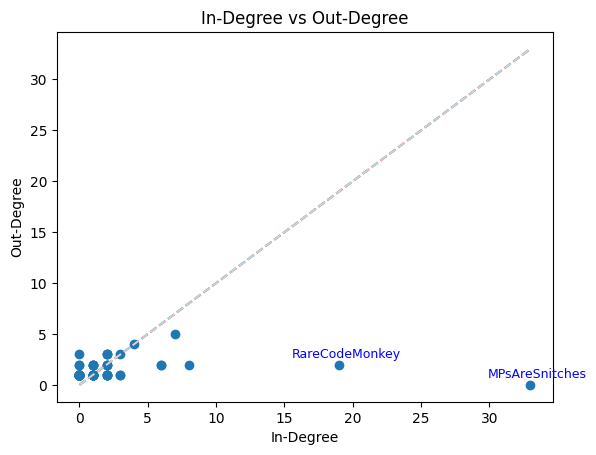

In [ ]:
plt.scatter(numero_archi_entranti.values(), numero_archi_uscenti.values())
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('In-Degree vs Out-Degree')
max_degree = max(max(numero_archi_entranti.values()), max(numero_archi_uscenti.values()))
plt.plot([0, max_degree], [0, max_degree], linestyle='--', color='red')  # Linea diagonale per confronto

for node, in_degree in numero_archi_entranti.items():
    out_degree = numero_archi_uscenti[node]
    if in_degree >= 15 or out_degree >= 15:
      for nome in numero_archi_entranti:
        if numero_archi_entranti[nome] == in_degree:
          n = nome
      plt.annotate(n, (in_degree, out_degree), textcoords="offset points", xytext=(5,5), ha='center', fontsize=9, color='blue')

plt.plot([0, max_degree], [0, max_degree], linestyle='--', color='PowderBlue')
plt.show()

In [ ]:
'''plt.scatter(numero_archi_entranti.values(), numero_archi_uscenti.values())
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('In-Degree vs Out-Degree')'''

"plt.scatter(numero_archi_entranti.values(), numero_archi_uscenti.values())\nplt.xlabel('In-Degree')\nplt.ylabel('Out-Degree')\nplt.title('In-Degree vs Out-Degree')"

## Comportamento temporale

In [ ]:
lista_giorno = {}
for n,date in enumerate(df6.createdAt):       # ricordare di cambiare il df?
  date = date.split('-')
  anno = date[0]
  mese = date[1]
  dday = date[2].split(':')

  giorno_ora = dday[0].split('T')
  giorno = giorno_ora[0]
  ora = giorno_ora[1]
  minuti = dday[1]

  secondi = dday[2].split('.')
  secondi = secondi[0]

  lista_giorno[n] = [anno, mese, giorno, ora, minuti, secondi]
'''lista_giorno'''

'lista_giorno'

Impostiamo la data del post come il tempo zero:

In [ ]:
diz_tempo = {}
for key in lista_giorno:
  anno = int(lista_giorno[key][0]) - int(lista_giorno[0][0])
  mese = int(lista_giorno[key][1]) - int(lista_giorno[0][1])
  giorno = int(lista_giorno[key][2])-int(lista_giorno[0][2])
  ora = int(lista_giorno[key][3])

  diz_tempo[key] = [anno, mese, giorno, ora]


l_ore = []
for chiavi in diz_tempo:
  anno = int(diz_tempo[chiavi][0])
  mese = int(diz_tempo[chiavi][1])
  giorno = int(diz_tempo[chiavi][2])
  ora = int(diz_tempo[chiavi][3])

  ore_anno = 8.760*anno
  ore_mese = 720*mese
  ore_giorno = giorno*24
  o = ore_anno + ore_mese + ore_giorno + ora - diz_tempo[0][3]
  l_ore.append(o)
l_ore = sorted(l_ore)

################################################################################
diz_ora_ordinato = {}
for indice, c in enumerate(l_ore):
  diz_ora_ordinato[indice] = c

diz_plot = {}
for cc in diz_ora_ordinato:
  chiav = diz_ora_ordinato[cc]
  if chiav not in diz_plot:
    diz_plot[chiav] = 1
  elif chiav in diz_plot:
    diz_plot[chiav] += 1
diz_plot

ddiz_plot ={}
for chiave in diz_plot:
  if chiave < 28:
    val = diz_plot[chiave]
    ddiz_plot[chiave] = val
ddiz_plot

{0.0: 2,
 1.0: 3,
 2.0: 9,
 3.0: 12,
 4.0: 21,
 5.0: 15,
 6.0: 20,
 7.0: 11,
 8.0: 6,
 9.0: 2,
 10.0: 2,
 11.0: 2,
 12.0: 3,
 14.0: 2,
 15.0: 1,
 16.0: 6,
 17.0: 7,
 18.0: 2,
 19.0: 3,
 20.0: 1,
 22.0: 1,
 23.0: 4,
 26.0: 2,
 27.0: 1}

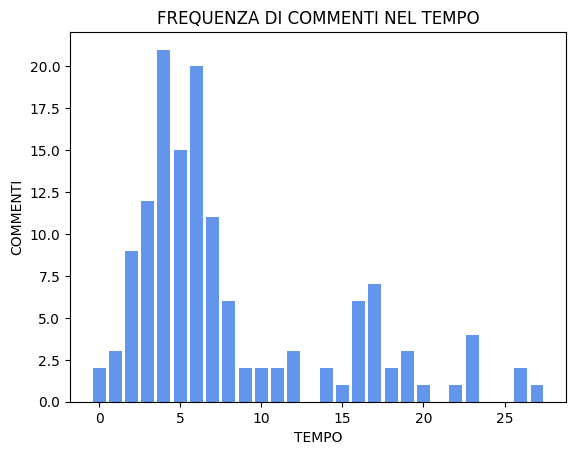

In [ ]:
plt.bar(ddiz_plot.keys(), ddiz_plot.values(), color = 'CornflowerBlue')
plt.xlabel('TEMPO')
plt.ylabel('COMMENTI')
plt.title('FREQUENZA DI COMMENTI NEL TEMPO')
plt.show()

# Utenti Particolari
Andiamo ad analizzare alcuni aspetti dei nostri grafi e ad analizzare gli utenti più attivi.

## Per il primo post

### Coppie più animate

In [ ]:
lista_df= [df1]         # Cambiare il df per analizzare le coppie di ogni post.

In [ ]:
#Devo contare quante volte un utente ha scritto ad un altro utente. Idea, creo un dizionario dove ogni chiave è un user e
#come valore ha un dizionario, dove ogni user è una chiave con associati due valori, il numero di messaggi che ha ricevuto
# e i vari indici delle righe del dataset.  {eeeEee: { Pickles_68: [5, 124, 4352, 52,..]
#                                                               ...    }}

dizionario = {}

for dataset in lista_df:
    # Cicliamo sul dataset per creare il dizionario
    for index, row in dataset.iterrows():
        # Ottieni l'utente che ha inviato il messaggio
        sender = row['username']
        receiver_id = row['parent_id']

        # Trova l'utente a cui è stato inviato il messaggio
        if pd.notna(receiver_id):  # Verifica che il parent_id non sia NaN
            receiver_row = dataset[dataset['comment_id'] == receiver_id]
            if not receiver_row.empty:
                receiver = receiver_row.iloc[0]['username']

                # Inizializza il dizionario per il mittente se non esiste
                if sender not in dizionario:
                    dizionario[sender] = {}

                # Aggiungi il destinatario al dizionario del mittente
                if receiver not in dizionario[sender]:
                    dizionario[sender][receiver] = [1, [index]]
                else:
                    dizionario[sender][receiver][0] += 1
                    dizionario[sender][receiver][1].append(index)

# Output del dizionario
print(dizionario)

{'Cstone812': {'SuperSeriousStud': [1, [32]], 'siditious': [1, [34]]}, 'siditious': {'Cstone812': [1, [33]]}, 'TurkTurkle': {'SuperSeriousStud': [1, [35]]}, 'Pickles_68': {'TurkTurkle': [1, [36]], 'eeeeeeeeEeeEEeeeE6': [3, [69, 74, 78]]}, 'eeeeeeeeEeeEEeeeE6': {'SuperSeriousStud': [1, [37]], 'Manjorno316': [4, [44, 48, 54, 61]], 'Siukslinis_acc': [1, [67]], 'Pickles_68': [2, [72, 76]]}, 'brazthemad': {'eeeeeeeeEeeEEeeeE6': [1, [38]]}, 'TwinSong': {'Cstone812': [1, [39]], 'Randi_Butternubs_3': [1, [66]], 'TwanToni': [1, [70]]}, 'Randi_Butternubs_3': {'SuperSeriousStud': [1, [40]], '[deleted]': [4, [45, 50, 53, 56]]}, 'The_Corvair': {'eeeeeeeeEeeEEeeeE6': [1, [41]]}, 'Manjorno316': {'eeeeeeeeEeeEEeeeE6': [5, [42, 46, 51, 57, 63]], '[deleted]': [2, [86, 90]], 'MM5D': [2, [91, 95]]}, '[deleted]': {'Randi_Butternubs_3': [4, [43, 47, 52, 55]], 'Crissaegrym': [2, [62, 97]], 'SuperSeriousStud': [5, [80, 84, 89, 99, 100]], 'MM5D': [1, [85]], 'Manjorno316': [1, [87]]}, 'thewalkindude': {'eeeeeee

In [ ]:
lista_conteggio = {}
for key in dizionario:               # key è il nome di chi scrive
  for key_value in dizionario[key]:  # key_value è il nome a cui è stato scritto.
    coppia = tuple(sorted([key, key_value]))
    lista_annidata = dizionario[key][key_value]
    numero_commenti = lista_annidata[0]
    indici_commenti = lista_annidata[1:]
    if coppia not in lista_conteggio:
      lista_conteggio[coppia] = [numero_commenti,indici_commenti]  # lista_conteggio[coppia][0],[1]
    elif coppia in lista_conteggio:
      lista_conteggio[coppia][0] += numero_commenti
      lista_conteggio[coppia][1].extend(indici_commenti)
print(lista_conteggio)

{('Cstone812', 'SuperSeriousStud'): [1, [[32]]], ('Cstone812', 'siditious'): [2, [[34], [33]]], ('SuperSeriousStud', 'TurkTurkle'): [1, [[35]]], ('Pickles_68', 'TurkTurkle'): [1, [[36]]], ('Pickles_68', 'eeeeeeeeEeeEEeeeE6'): [5, [[69, 74, 78], [72, 76]]], ('SuperSeriousStud', 'eeeeeeeeEeeEEeeeE6'): [1, [[37]]], ('Manjorno316', 'eeeeeeeeEeeEEeeeE6'): [9, [[44, 48, 54, 61], [42, 46, 51, 57, 63]]], ('Siukslinis_acc', 'eeeeeeeeEeeEEeeeE6'): [2, [[67], [65]]], ('brazthemad', 'eeeeeeeeEeeEEeeeE6'): [1, [[38]]], ('Cstone812', 'TwinSong'): [1, [[39]]], ('Randi_Butternubs_3', 'TwinSong'): [1, [[66]]], ('TwanToni', 'TwinSong'): [2, [[70], [68]]], ('Randi_Butternubs_3', 'SuperSeriousStud'): [1, [[40]]], ('Randi_Butternubs_3', '[deleted]'): [8, [[45, 50, 53, 56], [43, 47, 52, 55]]], ('The_Corvair', 'eeeeeeeeEeeEEeeeE6'): [1, [[41]]], ('Manjorno316', '[deleted]'): [3, [[86, 90], [87]]], ('MM5D', 'Manjorno316'): [3, [[91, 95], [93]]], ('Crissaegrym', '[deleted]'): [3, [[62, 97], [64]]], ('SuperSeri

Facciamo un PLOTTIGNO:

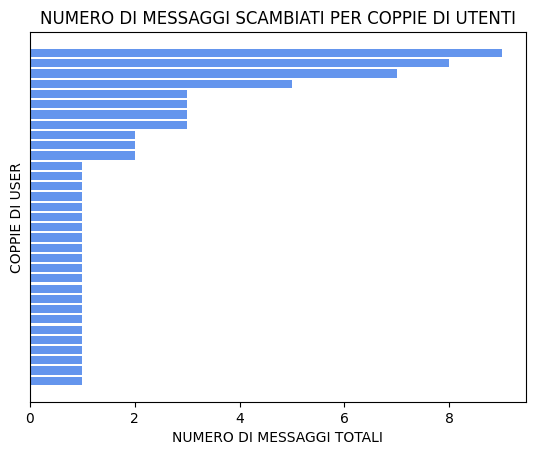

In [ ]:
#Estraiamo i valori per poterli plottare:
lista_chiavi= []
lista_valori = []
for coppie in lista_conteggio:
  lista_chiavi.append(str(coppie))
  lista_valori.append(int(lista_conteggio[coppie][0]))

plt.barh(lista_chiavi,sorted(lista_valori),color = 'CornflowerBlue')
plt.yticks([])
plt.xlabel('NUMERO DI MESSAGGI TOTALI')
plt.ylabel('COPPIE DI USER')
plt.title('NUMERO DI MESSAGGI SCAMBIATI PER COPPIE DI UTENTI')
plt.show()

Andiamo a cerare quelle coppie che hanno avuto più di 5 scambi di messaggi:

In [ ]:
lista_conteggio_piu_di_5 = {}
for coppie in lista_conteggio:
  if lista_conteggio[coppie][0] >= 5:                            # Selezionare la treshold
    lista_conteggio_piu_di_5[coppie] = lista_conteggio[coppie][0]

print(lista_conteggio_piu_di_5)

{('Pickles_68', 'eeeeeeeeEeeEEeeeE6'): 5, ('Manjorno316', 'eeeeeeeeEeeEEeeeE6'): 9, ('Randi_Butternubs_3', '[deleted]'): 8, ('SuperSeriousStud', '[deleted]'): 7}


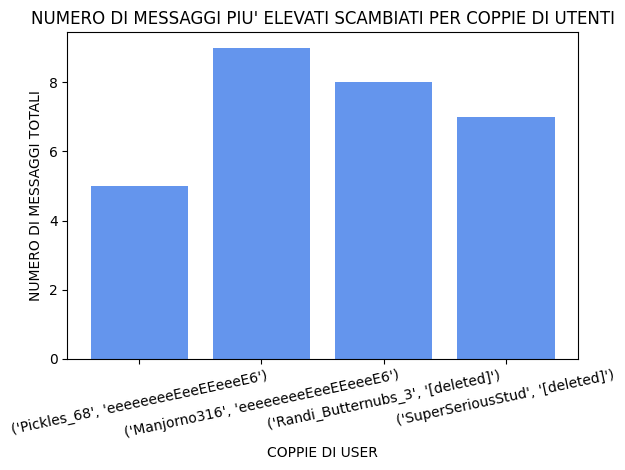

In [ ]:
#Estraiamo i valori per poterli plottare:
lista_chiavi= []
lista_valori = []
for coppie in lista_conteggio_piu_di_5:
  lista_chiavi.append(str(coppie))
  lista_valori.append(int(lista_conteggio_piu_di_5[coppie]))

plt.bar(lista_chiavi, lista_valori,color = 'CornflowerBlue')
plt.xlabel('COPPIE DI USER')
plt.xticks(rotation=12)
plt.ylabel('NUMERO DI MESSAGGI TOTALI')
plt.title("NUMERO DI MESSAGGI PIU' ELEVATI SCAMBIATI PER COPPIE DI UTENTI")

plt.tight_layout()
plt.show()

Andiamo a vedere cosa si sono detti:

----------------------------------------------------------------------------------
[deleted]: - I dont think its in decline, but the quality of games cerainly is


VOTO DELL'INTERA COMMUNITY DI REDDIT:  0
VAlORE ASSEGNATO DALLA SENTIMENT ANALYSIS_  neutral
----------------------------------------------------------------------------------
SuperSeriousStud: - The average is. But the best games of 2023 are worse than those of 2022? of 2013?


VOTO DELL'INTERA COMMUNITY DI REDDIT:  1
VAlORE ASSEGNATO DALLA SENTIMENT ANALYSIS_  neutral
----------------------------------------------------------------------------------
[deleted]: - I have legit not played a game released after 2013 that would truly captivate me and have me spend tons of hours with and want to return, graphics are better sure, but its usually one playtrough and im like “eeh it was okay” but nfsu, dragon age origins, kknd2, empire earth, silent hill 1-3, resident evil 1-3 plus veronica and outbreaks, diablo 2, the longest journ

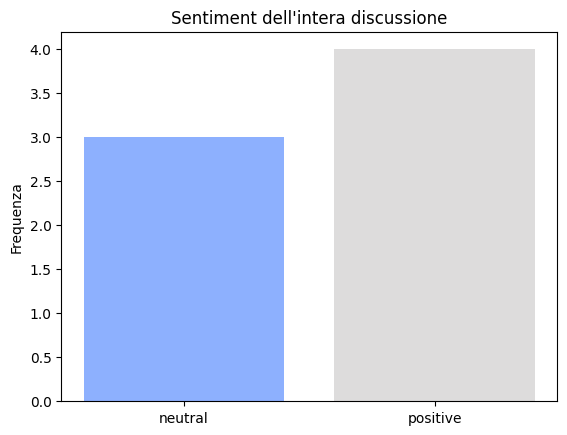

In [ ]:
lista_indici= []
for chiave in lista_conteggio:
  if chiave == ('SuperSeriousStud', '[deleted]'):
    for liste_di_indici_ in lista_conteggio[chiave][1]:
      lista_indici.extend(liste_di_indici_)
lista_indici = sorted(lista_indici)

print('----------------------------------------------------------------------------------')
raccolta_sentiment = []
for indici in lista_indici:
  chi = data.username.loc[indici]
  print(colored(chi,'red')+": -", data.body.loc[indici])
  print('\n')
  print("VOTO DELL'INTERA COMMUNITY DI REDDIT: ", data.upVotes.loc[indici])
  print("VAlORE ASSEGNATO DALLA SENTIMENT ANALYSIS_ ", data.sentiment_label[indici])
  raccolta_sentiment.append(data.sentiment_label[indici])
  print('----------------------------------------------------------------------------------')

frequenza_sentiment = Counter(raccolta_sentiment)       # Plottiamo
categorie = list(frequenza_sentiment.keys())
frequenze = list(frequenza_sentiment.values())
colors = [sns.color_palette('coolwarm', 3)[0], sns.color_palette('coolwarm', 3)[1], sns.color_palette('coolwarm', 3)[2]]
plt.bar(categorie, frequenze, color=colors)
plt.title("Sentiment dell'intera discussione")
plt.ylabel('Frequenza')
plt.show()

### Vediamo i commenti più votati

Text(0.5, 1.0, 'VOTI VS INDICI')

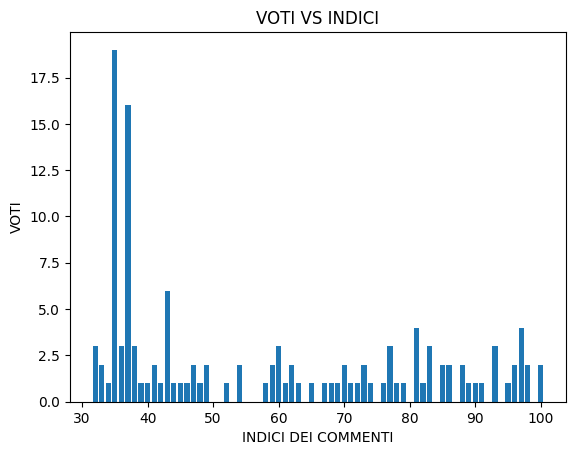

In [ ]:
diz_voti = {}
for _,rows in df1.iterrows():
  if int(rows.upVotes) > 0:
    diz_voti[_]=rows.upVotes
plt.bar(diz_voti.keys(),diz_voti.values())
plt.xlabel('INDICI DEI COMMENTI')
plt.ylabel('VOTI')
plt.title('VOTI VS INDICI')

In [ ]:
lista_commenti_più_votati= []
diz_voti_ordinato = dict(sorted(diz_voti.items(), key=lambda x: x[1], reverse=True))
for key in diz_voti_ordinato:
  if diz_voti_ordinato[key] >= 4:     # Scegliere il minimo valore di voti
    lista_commenti_più_votati.append(key)

print('----------------------------------------------------')
for commmenti in lista_commenti_più_votati:
  user = data.username.loc[commmenti]
  voto = data.upVotes.loc[commmenti]
  testo = data.body.loc[commmenti]
  sentiment = data.sentiment_label.loc[commmenti]
  print(user,'ha ricevuto',voto,'voti e scrive: ',testo)
  print('Valore della sentiment: ',sentiment)
  print('----------------------------------------------------')

----------------------------------------------------
TurkTurkle ha ricevuto 19 voti e scrive:  Neither. 

Ive been gaming since the late 80s and can confidently say

Its always been like this. A few islands of quality in a sea of sewage
Valore della sentiment:  neutral
----------------------------------------------------
eeeeeeeeEeeEEeeeE6 ha ricevuto 16 voti e scrive:  it's weird.

gaming is evolving as an industry, and an artform.

which is both good, and bad. there are lots of positives and lots of negatives.

for every tears of the kingdom there are 4-5 battlefield 2042s.

on a super high note. larian studios, have decided that every single person who purchased Baldur's gate 3 in early access, gets the full game, and an upgrade to the deluxe edition which includes a decent amount of things, free of charge.

not bad for a game I've technically owned for 3 years already.

they work so closely with the community to develop something truly special.
Valore della sentiment:  positive
---

## Per il secondo post

### Risposte a Monkey:

Per il df6 analizziamo l'utente RareCodeMonkey;

In [ ]:
lista_df = [df6]

dizionario = {}
for dataset in lista_df:
    # Cicliamo sul dataset per creare il dizionario
    for index, row in dataset.iterrows():
        # Ottieni l'utente che ha inviato il messaggio
        sender = row['username']
        receiver_id = row['parent_id']

        # Trova l'utente a cui è stato inviato il messaggio
        if pd.notna(receiver_id):  # Verifica che il parent_id non sia NaN
            receiver_row = dataset[dataset['comment_id'] == receiver_id]
            if not receiver_row.empty:
                receiver = receiver_row.iloc[0]['username']

                # Inizializza il dizionario per il mittente se non esiste
                if sender not in dizionario:
                    dizionario[sender] = {}

                # Aggiungi il destinatario al dizionario del mittente
                if receiver not in dizionario[sender]:
                    dizionario[sender][receiver] = [1, [index]]
                else:
                    dizionario[sender][receiver][0] += 1
                    dizionario[sender][receiver][1].append(index)

print('##############  RareCodeMonkey  ###########')
lista_messaggi_a_RareCode_Monkey = []      # Vediamo cosa scrive lui
for chiavi in dizionario:
  if chiavi == 'RareCodeMonkey':
    diz_prov = dizionario[chiavi]
    for ii in diz_prov:
      for ind in diz_prov[ii][1]:
        testo = df6.body.loc[ind]
        voti = df6.upVotes.loc[ind]
        sentiment = df6.sentiment_label.loc[ind]
        reply = df6.numberOfreplies.loc[ind]
        print('----------------------------------------------------------------------------------')
        print('Scive: ',testo)
        print('\n')
        print("VOTO DELL'INTERA COMMUNITY DI REDDIT:",voti)
        print("VAlORE ASSEGNATO DALLA SENTIMENT ANALYSIS:",sentiment)
        print("Numero di risposte:",reply)
print('----------------------------------------------------------------------------------')

##############  RareCodeMonkey  ###########
----------------------------------------------------------------------------------
Scive:  It is just impossible for the average person to read all the licenses, policies, etc. that come with on-line services, software and games. You could not do that even if it was your full-time job.

You "clicked accept to play the game, so, we can do whatever we want" it's out of hand. It should be way more limited what this kind of licenses can include, and make illegal the most outrageous.  Even children are accepting these policies. 

All of that for what? To extract as much money as possible from users. Pricing for virtual items that are carefully crafted to maximize profit and minimize value.


VOTO DELL'INTERA COMMUNITY DI REDDIT: 1113
VAlORE ASSEGNATO DALLA SENTIMENT ANALYSIS: negative
Numero di risposte: 18.0
----------------------------------------------------------------------------------
Scive:  Yes. This is something that needs to be changed b

----------------------------------------------------------------------------------
[deleted] scrive:  And you're going to accept. It's not as if declining is a real option because almost every product comes with an equally terrible privacy policy. In order for people to decline there needs to be an alternative.


VOTO DELL'INTERA COMMUNITY DI REDDIT:  403
VAlORE ASSEGNATO DALLA SENTIMENT ANALYSIS_  negative
----------------------------------------------------------------------------------
hopsmonkey scrive:  &gt; All of that for what?

And also to allow them to shut off access whenever they feel like you should no longer get to play the game you bought.


VOTO DELL'INTERA COMMUNITY DI REDDIT:  49
VAlORE ASSEGNATO DALLA SENTIMENT ANALYSIS_  neutral
----------------------------------------------------------------------------------
spiritbx scrive:  &gt; Even children are accepting these policies.

Imagine that instead of fixing the problems they just change the law so that children can c

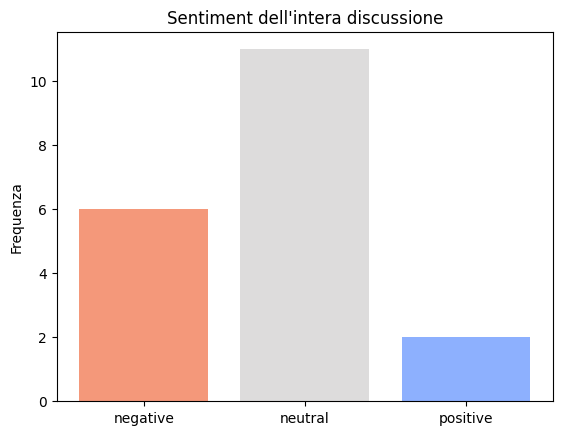

In [ ]:
lista_messaggi_a_RareCode_Monkey = []
for chiavi in dizionario:
  diz_provvisorio = dizionario[chiavi]
  for a_chi in diz_provvisorio:
    if a_chi == 'RareCodeMonkey':
      for indici_monkey in diz_provvisorio[a_chi][1]:
        lista_messaggi_a_RareCode_Monkey.append(indici_monkey)

print('----------------------------------------------------------------------------------')
raccolta_sentiment = []
for indici in lista_messaggi_a_RareCode_Monkey:
  chi = df6.username.loc[indici]
  testo = df6.body.loc[indici]
  voti = df6.upVotes.loc[indici]
  sentiment = df6.sentiment_label.loc[indici]
  print(chi, 'scrive: ', testo)
  print('\n')
  print("VOTO DELL'INTERA COMMUNITY DI REDDIT: ", voti)
  print("VAlORE ASSEGNATO DALLA SENTIMENT ANALYSIS_ ", sentiment)
  raccolta_sentiment.append(sentiment)
  print('----------------------------------------------------------------------------------')

frequenza_sentiment = Counter(raccolta_sentiment)       # Plottiamo
categorie = list(frequenza_sentiment.keys())
frequenze = list(frequenza_sentiment.values())
colors = [sns.color_palette('coolwarm', 3)[2], sns.color_palette('coolwarm', 3)[1], sns.color_palette('coolwarm', 3)[0]]
plt.bar(categorie, frequenze, color=colors)
plt.title("Sentiment dell'intera discussione")
plt.ylabel('Frequenza')
plt.show()

### Community detection con clustering

detect_communities_leiden" è il nome di una funzione o metodo che utilizza l'algoritmo Leiden per rilevare le comunità in una rete, come ad esempio un grafo. L'algoritmo Leiden è una versione migliorata dell'algoritmo Louvain, che è uno degli algoritmi più popolari per la community detection.

Ecco una spiegazione di alto livello di come funziona l'algoritmo Leiden:

Inizializzazione: L'algoritmo inizia con una partizione casuale dei nodi del grafo in comunità.

Ottimizzazione locale: L'algoritmo tenta di migliorare la partizione corrente muovendo iterativamente i nodi tra le comunità. Questi spostamenti sono fatti in modo da massimizzare una metrica di qualità della partizione, come la modularità.

Ottimizzazione globale: Dopo una serie di passaggi di ottimizzazione locale, l'algoritmo esegue un'ottimizzazione globale per cercare di ottenere una partizione ancora migliore. Durante questa fase, vengono esplorati cambiamenti più ampi nella partizione dei nodi.

Criterio di convergenza: L'algoritmo continua ad eseguire passaggi di ottimizzazione locale e globale fino a quando non si verifica un criterio di convergenza, che può essere basato su un numero massimo di iterazioni o su un miglioramento insufficiente della qualità della partizione.

L'obiettivo principale dell'algoritmo Leiden è quello di ottenere una partizione dei nodi del grafo in comunità che massimizzi la modularità o un'altra metrica di qualità della partizione.

Per quanto riguarda le formule, la principale metrica utilizzata per valutare la qualità della partizione è la modularità. La modularità misura quanto le connessioni all'interno delle comunità siano più dense rispetto a quelle tra le comunità. La formula di base della modularità per una partizione dei nodi è la seguente:

𝑄
=
1
2
𝑚
∑
𝑖
𝑗
(
𝐴
𝑖
𝑗
−
𝑘
𝑖
𝑘
𝑗
2
𝑚
)
𝛿
(
𝑐
𝑖
,
𝑐
𝑗
)
Q=
2m
1
​
 ∑
ij
​
 (A
ij
​
 −
2m
k
i
​
 k
j
​

​
 )δ(c
i
​
 ,c
j
​
 )

dove:

𝑄
Q è la modularità della partizione,
𝐴
𝑖
𝑗
A
ij
​
  è l'elemento
𝑖
,
𝑗
i,j-esimo della matrice di adiacenza del grafo,
𝑘
𝑖
k
i
​
  e
𝑘
𝑗
k
j
​
  sono i gradi dei nodi
𝑖
i e
𝑗
j,
𝑚
m è il numero totale di archi nel grafo,
𝛿
(
𝑐
𝑖
,
𝑐
𝑗
)
δ(c
i
​
 ,c
j
​
 ) è la delta di Kronecker, che è uguale a 1 se
𝑖
i e
𝑗
j appartengono alla stessa comunità e 0 altrimenti.
Durante l'ottimizzazione, Leiden cerca di massimizzare questa formula, muovendo i nodi tra le comunità in modo da aumentare la modularità complessiva della partizione.

Spero che questa spiegazione ti aiuti a capire meglio come funziona l'algoritmo Leiden e cosa fa la funzione "detect_communities_leiden" quando viene chiamata su un grafo. Fammi sapere se hai altre domande!

In [ ]:
def detect_communities_leiden(g):
    partition = la.find_partition(g, la.RBConfigurationVertexPartition, weights=g.es["weight"])
    return partition
clusters = detect_communities_leiden(g2)
cluster_dict = {g2.vs[node]['name']: cluster for node, cluster in enumerate(clusters.membership)}  # dizionario

print("Community detection results:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

Community detection results:
Cluster 0: [1, 7, 8, 10, 14, 19, 31, 32, 43, 44, 46, 48, 49, 52, 56, 59, 60, 61, 62, 63, 68, 77, 78, 80, 86, 90, 96, 98, 99]
Cluster 1: [4, 6, 9, 24, 26, 37, 39, 42, 53, 57, 79, 82, 87, 88, 89, 104, 106]
Cluster 2: [3, 17, 18, 25, 28, 29, 34, 51, 70, 74, 76, 81, 83, 95, 97, 100]
Cluster 3: [5, 33, 35, 47, 50, 69, 71, 72, 75, 84, 92, 93, 107]
Cluster 4: [0, 13, 21, 22, 27, 54, 58, 65, 91, 105]
Cluster 5: [11, 23, 38, 41, 45, 55, 85, 94]
Cluster 6: [2, 16, 36, 103]
Cluster 7: [12, 20, 40]
Cluster 8: [64, 66, 73]
Cluster 9: [30, 67, 102]
Cluster 10: [15, 101]


In [ ]:
'''cluster_dict'''

#{'The-Ugliest-Duck': 0,      OUTPUT
# 'Baerghuhn': 0,
# 'Stillback7': 7,
# 'CuddlyChinchilla': 4,
# 'Dhiox': 2,
# 'jblanch3': 4,
# 'Misragoth': 2,
# 'Strider76239': 5,
# 'EnergyCreature': 0,
# '[deleted]': 3,

'cluster_dict'

In [ ]:
diz_colori = {0:'DarkOrchid', 1: 'Aquamarine', 2:'IndianRed',  3: 'CornflowerBlue', 4:'Pink',  5: 'DarkSlateGrey', 6:'Khaki',
              7: 'Gainsboro', 8:'Olive',  9: 'Orange', 10:'salmon'}

for nodo in g2.vs:
    indice_nodo = nodo.index    # Ottieni l'indice del nodo
    nodo_label = nodo["name"]   # Ottieni l'etichetta del nodo
    chiave_diz_colori = cluster_dict[nodo_label]
    colore = diz_colori[chiave_diz_colori]
    nodo["color"] = colore
    nodo["name"] = cluster_dict[nodo_label]

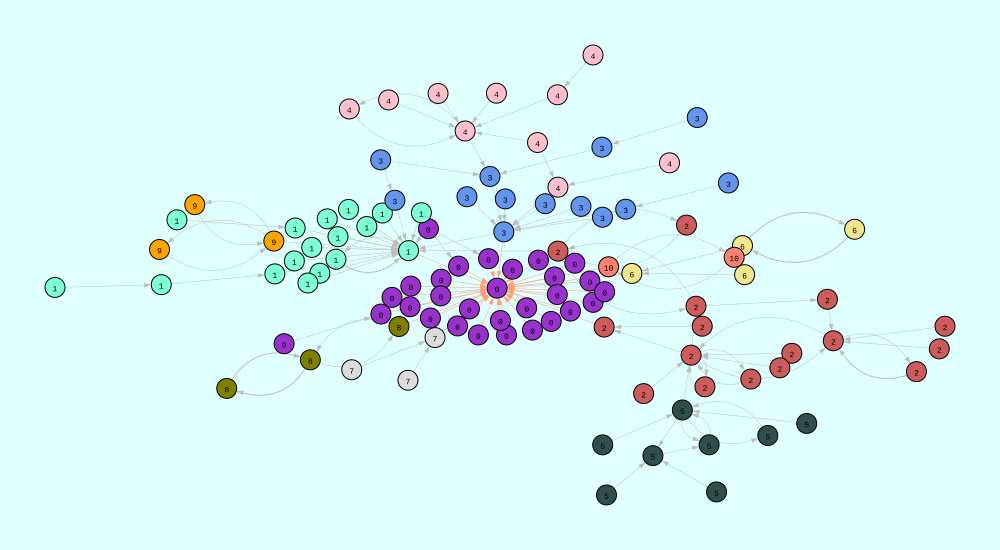

In [ ]:
layout = g2.layout('kamada_kawai')
ig.plot(g2, layout=layout,  vertex_label=g.vs["name"],
        edge_color=edge_colors, edge_width=[w['weight']/2 for w in g.es],edge_arrow_size=0.5,
        vertex_label_size = 8,
        bbox = (1000,550),
        background="LightCyan",
        margin = 55)

Diamo un nome ai gruppi (un tema)

In [ ]:
diz_utenti = {}
for _,row in df6.iterrows():
  reply = row.numberOfreplies
  user = row.username
  testo = row.body
  if user not in diz_utenti:
    diz_utenti[user] = [_,reply,testo]
  if user in diz_utenti:
    if diz_utenti[user][1] < reply:
      diz_utenti[user][1] = [_,reply,testo]

diz_capitano = {}
for utenti in diz_utenti:
  indice = diz_utenti[utenti][0]
  testo = diz_utenti[utenti][2]
  reply = diz_utenti[utenti][1]
  numero_cluster = cluster_dict[utenti]
  if numero_cluster not in diz_capitano:
    diz_capitano[numero_cluster] = [reply,indice,testo,utenti]
  elif numero_cluster in diz_capitano:
    if diz_capitano[numero_cluster][0] < reply:
      diz_capitano[numero_cluster] = [reply,indice,testo,utenti]

diz_capitano

{0: [nan,
  3038,
  'URL: https://thedailycougar.com/2024/04/09/abusive-privacy-policies-in-video-games-a-grim-sign-for-industry/\nThumbnail: https://b.thumbs.redditmedia.com/Agn3HgE5NIy9BzQ0iCZQ7TIVKqxIHB0LUXXPusO0DWw.jpg\nImages:\n\thttps://external-preview.redd.it/KoDdukGD_5QEueFHADnYJ4DkWx6c56CpFYbYDjAA1zg.jpg?auto=webp&amp;s=d87a4ae757bc62bdf47a4901bad9ab6a35f87caf\n',
  'MPsAreSnitches'],
 1: [18.0,
  3039,
  'It is just impossible for the average person to read all the licenses, policies, etc. that come with on-line services, software and games. You could not do that even if it was your full-time job.\n\nYou "clicked accept to play the game, so, we can do whatever we want" it\'s out of hand. It should be way more limited what this kind of licenses can include, and make illegal the most outrageous.  Even children are accepting these policies. \n\nAll of that for what? To extract as much money as possible from users. Pricing for virtual items that are carefully crafted to maximize

# Brutta

In [ ]:
df6

,Unnamed: 0,body,createdAt,dataType,comment_id,numberOfreplies,parent_id,postId,upVotes,username,sentiment_label,sentiment_value
3038,0,URL: https://thedailycougar.com/2024/04/09/abu...,2024-04-09T16:47:48.000Z,post,t3_1bzwwsl,NaN,NaN,NaN,3195,MPsAreSnitches,neutral,0.6066
3039,1,It is just impossible for the average person t...,2024-04-09T18:57:07.000Z,comment,t1_kyt5lmy,18.0,t3_1bzwwsl,t3_1bzwwsl,1113,RareCodeMonkey,negative,0.6141
3040,2,And you're going to accept. It's not as if dec...,2024-04-09T20:14:57.000Z,comment,t1_kytjk47,8.0,t1_kyt5lmy,t3_1bzwwsl,403,[deleted],negative,0.7863
3041,3,The only way to win is not to play.,2024-04-09T21:10:12.000Z,comment,t1_kyttfpr,3.0,t1_kytjk47,t3_1bzwwsl,159,ADHD_Supernova,neutral,0.6645
3042,4,"i'm an old person, but i got my first fancy gr...",2024-04-09T21:29:27.000Z,comment,t1_kytwqjg,6.0,t1_kyttfpr,t3_1bzwwsl,137,No-Roll-3759,negative,0.8564
...,...,...,...,...,...,...,...,...,...,...,...,...
3174,139,You don't have to play games to participate in...,2024-04-09T22:00:14.000Z,comment,t1_kyu1uq3,1.0,t1_kyu0m7d,t3_1bzwwsl,3,TheEternalGazed,neutral,0.8485
3175,140,"I never said you did, but it will heighten the...",2024-04-09T22:05:29.000Z,comment,t1_kyu2pgw,1.0,t1_kyu1uq3,t3_1bzwwsl,2,Barredbob,positive,0.6506
3176,141,"Well, if you think you're making a profound an...",2024-04-09T23:29:25.000Z,comment,t1_kyufx71,1.0,t1_kyu2pgw,t3_1bzwwsl,1,TheEternalGazed,neutral,0.7447
3177,142,"That wasn’t at all my point, my point was it h...",2024-04-09T23:34:56.000Z,comment,t1_kyugruf,0.0,t1_kyufx71,t3_1bzwwsl,2,Barredbob,neutral,0.6236
